# Projek Simulasi Fisika 119 <a class="anchor"  id="top"></a>
## Dosen Pengampu Mata Kuliah: Dr. Mutia Delina, M.Si
- Nama : Difa Farhani Hakim
- NIM : 1306620040
- Kelas : Fisika B 2020

## Tujuan Projek

1. Menerapkan metode Quantum Monte Carlo (QMC) pada sistem $\text{H}$, $\text{He}^+$, dan $\text{Li}^{2+}$
2. Menganalisis pengaruh pemilihan fungsi gelombang coba $\Psi_{T}$ dan nilai parameter variasi $\alpha$ terhadap energi dasar sistem.

## Table of Contents 
* [Metropolis Algorithm](#chap1)
* [Variational Monte Carlo](#chap2)
* [Hydrogen Atom Derivation](#chap3)
    * [Hydrogen Atom](#sub3.1)
    * [Hydrogen-like ions STO](#sub3.2)
* [Experiment Result](#chap4)
    * [$\alpha$ tetap](#sub4.1)
    * [$\alpha$ bervariasi](#sub4.2)  

In [1]:
import numpy as np
import sympy as sp
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns

# Metropolis Algorithm <a class="anchor"  id="chap1"></a>
Adapun langkah-langkah algoritma Metropolis pada projek ini adalah sebagai berikut.
- Choose starting point $x_0$
- Choose new point randomly
$$x_{trial} = [x_i - \frac{h}{2}, x_i + \frac{h}{2}]$$
- Calculate ratio (r)
$$r = \frac{f(x_{trial})}{f(x_i)}$$
- if $r \geq 1 \rightarrow x_{i+1} = x_{trial}$ 
- if $r < 1$: 
    - Choose random number $\eta$ [0,1]
    - if $\eta < r \rightarrow x_{i+1} = x_{trial}$
    - if $\eta \geq r \rightarrow x_{i+1} = x_i$
    
Sumber:
- https://www.ias.ac.in/public/Volumes/reso/019/08/0713-0739.pdf, pp. 722-726

# Variational Monte Carlo (VMC) <a class="anchor"  id="chap2"></a>

Variational Monte Carlo atau dikenal juga dengan istilah Quantum Monte Carlo (QMC) adalah sebuah metode aproksimasi dalam menghitung energi dasar sebah sistem kuantum dengan gabungan metode Variasi dan metode Monte Carlo.

$$\hat{H} \Psi(R)= E\Psi(R)$$

$$\left \langle H \right \rangle = E_T = \frac{\int \Psi_T^*(R) \hat{H} \Psi_T(R) dR}{\int \Psi_T^*(R) \Psi_T(R) dR} \geq E_{min}$$

$$ E_T = \int \rho(R) E_L(R) dR$$

$$\rho(R) = \frac{\Psi_T^2}{\int \Psi_T^2 dR}$$

$$E_L = \frac{\hat{H} \Psi_T}{\Psi_T}$$

$$ E_T = \int \rho(R) E_L(R) dR \approx \frac{1}{N} \sum_i^N E_L(R_i)$$

Sumber:
- https://www.ias.ac.in/public/Volumes/reso/019/08/0713-0739.pdf, pp. 726-727
- https://compphysics.github.io/ComputationalPhysics/doc/pub/vmc/html/vmc.html

# Hydrogen Atom Derivation <a class="anchor"  id="chap3"></a>

## Hydrogen Atom <a class="anchor"  id="sub3.1"></a>

Bagian ini adalah hasil yang akan digenerate dan diperluas pada sistem atom 1 elektron lainnya, seperti $\text{He}^+$, dan $\text{Li}^{2+}$.

$$\hat{H} = - \frac{1}{2} \nabla^2 - \frac{1}{\rho}$$

$$\Psi_T (\rho)= \alpha \rho e^{-\alpha \rho}$$

$$E_L = \frac{\hat{H} \Psi_T}{\Psi_T} = \frac{1}{\Psi_T (\rho)} [- \frac{1}{2} \nabla^2 \Psi_T (\rho) - \frac{1}{\rho}\Psi_T (\rho)] $$

$$E_L = -\frac{1}{\rho} - \frac{\alpha}{2}(\alpha - \frac{2}{\rho})$$

Sumber:
- https://compphysics.github.io/ComputationalPhysics/doc/pub/vmc/html/vmc.html

## Hydrogen-like ion STO <a class="anchor"  id="sub3.2"></a>

Berdasarkan rumus sebelumnya, Hamiltonian pada kasus atom 1 elektron dapat dituliskan sebagai berikut.

$$\hat{H} = - \frac{1}{2} \nabla^2 - \frac{Z}{\rho}$$

$$\Psi_T (\rho)= \alpha \rho e^{-\alpha \rho}$$

In [2]:
s_alp, s_rho, s_Z = sp.symbols('alpha rho Z')
psi_T = s_alp * s_rho * sp.exp(-s_alp*s_rho) 
display(psi_T)

alpha*rho*exp(-alpha*rho)

Energi Lokal $E_L$ dapat dicari dengan menggunakan fungsi differential pada library sympy

In [3]:
EL = - psi_T.diff(s_rho,2)/ psi_T - s_Z/s_rho
EL

-Z/rho - alpha*(alpha*rho - 2)/rho

Maka diperoleh $E_L$ sebagai berikut.

$$E_L = -\frac{Z}{\rho} - \frac{\alpha}{2}(\alpha - \frac{2}{\rho})$$

- Pada H (Z = 1):
$$E_L = -\frac{1}{\rho} - \frac{\alpha}{2}(\alpha - \frac{2}{\rho})$$

- Pada He+ (Z = 2):
$$E_L = -\frac{2}{\rho} - \frac{\alpha}{2}(\alpha - \frac{2}{\rho})$$


In [4]:
def psi_H_ion_func(rho,alpha=1):
    psi = alpha*rho*np.exp(-alpha*rho)
    return psi

def E_H_ion_func(rho,alpha=1,Z=1):
    E = -Z/rho - alpha/2 * (alpha - 2/rho)
    return E

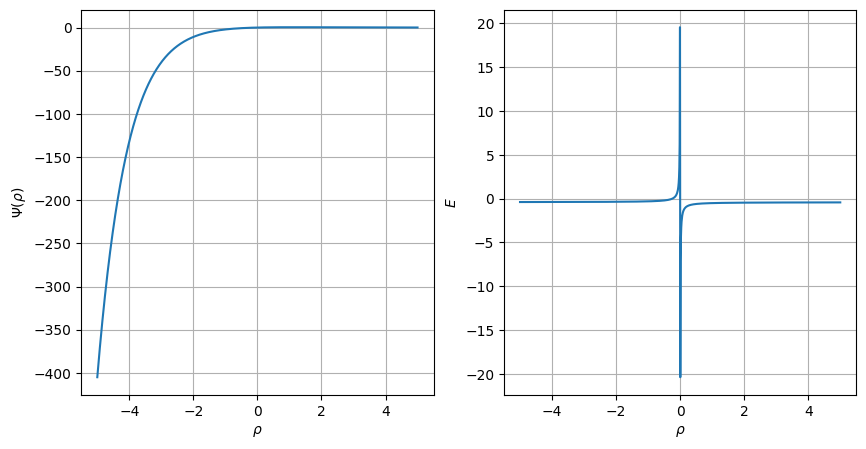

In [5]:
x_plot = np.linspace(-5,5,1000)
alpha_H = 0.9
y_H = psi_H_ion_func(rho=x_plot,alpha = alpha_H)
E_H = E_H_ion_func(rho=x_plot,alpha = alpha_H, Z = 1)
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(x_plot,y_H)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\Psi(\rho)$')
plt.grid()
plt.subplot(122)
plt.plot(x_plot,E_H)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$E$')
plt.grid()

# Experiment Result <a class="anchor"  id="chap4"></a>

Berikut adalah penerapan algoritma VMC dengan nilai parameter variasi $\alpha$ yang tetap dan nilai parameter variasi $\alpha$ yang bervariasi.

## 1. Parameter variasi $\alpha$ tetap <a class="anchor"  id="sub4.1"></a>

### Fungsi STO

In [6]:
np.random.seed(1)
def VMC(psi_func, E_func, x0 = 0.1, N_iter = 1000, N_step = 0.1, alpha=1, Z=1):
    E_list = []
    x_list = []
    acc_step = 0
    x_i = x0
    E_local = E_func(x_i,alpha,Z)
    
    E_list.append(E_local)
    x_list.append(x_i)
    for i in range(int(N_iter)):
        # Choose a new configuration
        a = x_i - N_step/2
        b = x_i + N_step/2
        x_trial = np.random.uniform(a,b,1)[0]
        
        #ratio of R_new and R_old
        r = psi_func(x_trial,alpha)/psi_func(x_i,alpha)
        miu = 0
        
        if r >= 1:
            x_i = x_trial #x_(i+1) = x_trial
            acc_step += 1
        else: # r < 1
            miu = np.random.uniform(0,1,1)[0]
            if miu < r:
                x_i = x_trial
                acc_step += 1
            else: # miu >= r
                x_i = x_i
#         if i % 100 == 0:
#             print(i, r, miu)
            
        E_local = E_func(x_i,alpha,Z)
        E_list.append(E_local)
        x_list.append(x_i)
            
    acc_ratio = acc_step/ N_iter        
    return np.array(E_list), np.array(x_list), acc_ratio

In [7]:
def avg_func(x_list):
    N = len(x_list)
    return np.sum(x_list)/N

### Hydrogen Atom

In [8]:
alpha_H = 0.9
E_list_H, x_list_H, acc_ratio_H = VMC(psi_func = psi_H_ion_func, 
                                            E_func = E_H_ion_func, 
                                            x0 = 2, N_iter = 1e5, 
                                            N_step = 5, alpha=alpha_H, Z=1)
E_avg_H = avg_func(E_list_H)
E_var_H = st.variance(E_list_H)
x_avg_H = avg_func(x_list_H)
y_list_H = psi_H_ion_func(rho=x_list_H,alpha = alpha_H)
text = '{:8} : {:5.3f}'
print(text.format('E avg',E_avg_H))
print(text.format('E var',E_var_H))
print(text.format('x avg',x_avg_H))
print(text.format('acc',acc_ratio_H))

E avg    : -0.495
E var    : 0.049
x avg    : 2.240
acc      : 0.625


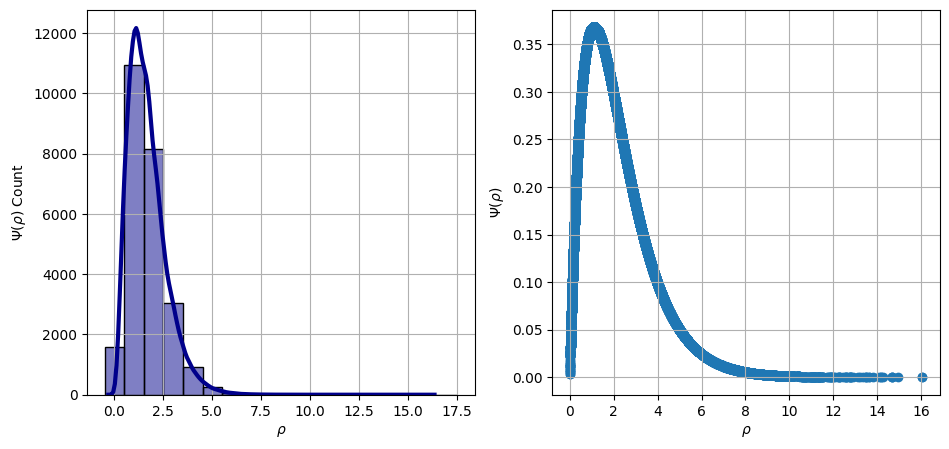

In [9]:
fig = plt.figure(figsize=(11,5))
# plt.suptitle(r'Energy and $\Psi(\rho)$ function distribution $He^+$')
plt.subplot(121)
sns.histplot(x=x_list_H, weights=y_list_H, discrete=True,
             color='darkblue', edgecolor='black',
             kde=True, kde_kws={'cut': 2}, line_kws={'linewidth': 3})
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\Psi(\rho)$ Count')
plt.grid()
plt.subplot(122)
plt.scatter(x_list_H,y_list_H)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\Psi(\rho)$')
plt.grid()

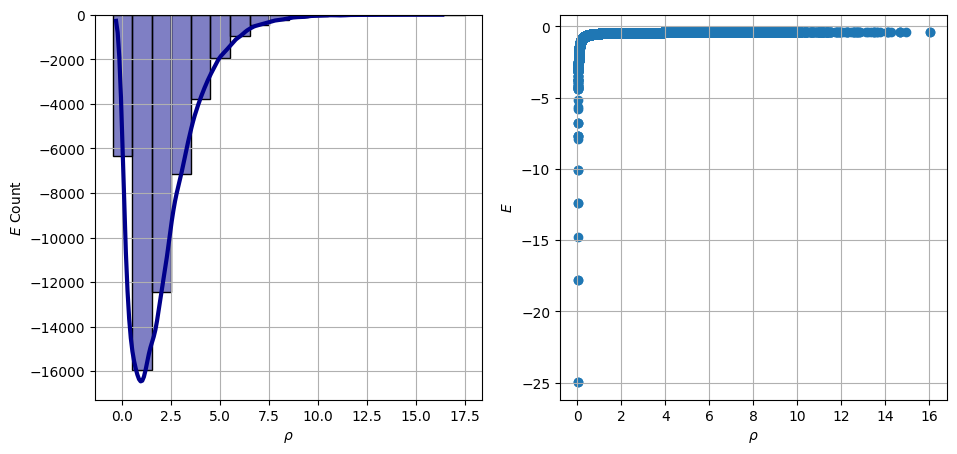

In [10]:
fig = plt.figure(figsize=(11,5))
plt.subplot(121)
sns.histplot(x=x_list_H, weights=E_list_H, discrete=True,
             color='darkblue', edgecolor='black',
             kde=True, kde_kws={'cut': 2}, line_kws={'linewidth': 3})
plt.xlabel(r'$\rho$')
plt.ylabel(r'$E$ Count')
plt.grid()
plt.subplot(122)
plt.scatter(x_list_H,E_list_H)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$E$')
plt.grid()

### He+

In [11]:
alpha_He_p = 1.9
E_list_He_p, x_list_He_p, acc_ratio_He_p = VMC(psi_func = psi_H_ion_func, 
                                            E_func = E_H_ion_func, 
                                            x0 = 1, N_iter = 1e5, 
                                            N_step = 4, alpha=alpha_He_p, Z=2)
E_avg_He_p = avg_func(E_list_He_p)
E_var_He_p = st.variance(E_list_He_p)
x_avg_He_p = avg_func(x_list_He_p)
y_list_He_p = psi_H_ion_func(rho=x_list_He_p,alpha = alpha_He_p)
text = '{:8} : {:5.3f}'
print(text.format('E avg',E_avg_He_p))
print(text.format('E var',E_var_He_p))
print(text.format('x avg',x_avg_He_p))
print(text.format('acc',acc_ratio_He_p))

E avg    : -1.999
E var    : 1.382
x avg    : 1.057
acc      : 0.449


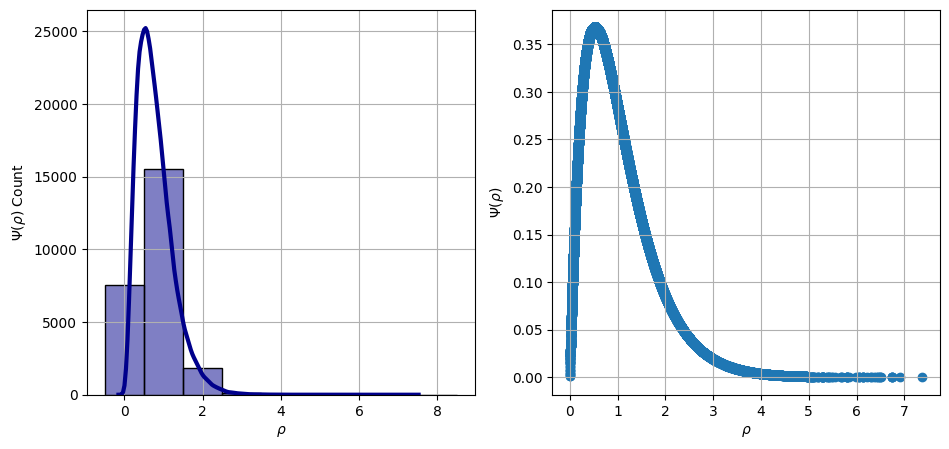

In [12]:
fig = plt.figure(figsize=(11,5))
# plt.suptitle(r'Energy and $\Psi(\rho)$ function distribution $He^+$')
plt.subplot(121)
sns.histplot(x=x_list_He_p, weights=y_list_He_p, discrete=True,
             color='darkblue', edgecolor='black',
             kde=True, kde_kws={'cut': 2}, line_kws={'linewidth': 3})
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\Psi(\rho)$ Count')
plt.grid()
plt.subplot(122)
plt.scatter(x_list_He_p,y_list_He_p)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\Psi(\rho)$')
plt.grid()

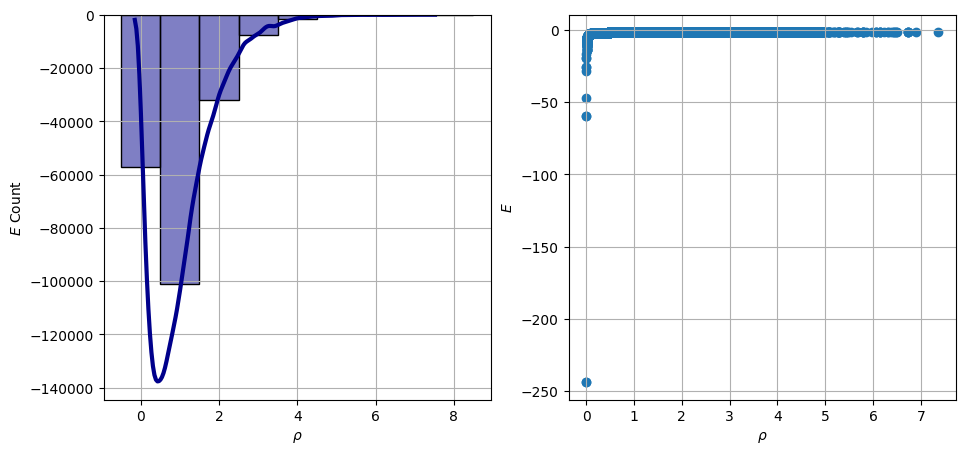

In [13]:
fig = plt.figure(figsize=(11,5))
plt.subplot(121)
sns.histplot(x=x_list_He_p, weights=E_list_He_p, discrete=True,
             color='darkblue', edgecolor='black',
             kde=True, kde_kws={'cut': 2}, line_kws={'linewidth': 3})
plt.xlabel(r'$\rho$')
plt.ylabel(r'$E$ Count')
plt.grid()
plt.subplot(122)
plt.scatter(x_list_He_p,E_list_He_p)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$E$')
plt.grid()

### Li2+

In [14]:
alpha_Li_p2 = 2.9
E_list_Li_p2, x_list_Li_p2, acc_ratio_Li_p2 = VMC(psi_func = psi_H_ion_func, 
                                            E_func = E_H_ion_func, 
                                            x0 = 0.7, N_iter = 1e5, 
                                            N_step = 2, alpha=alpha_Li_p2, Z=3)
E_avg_Li_p2 = avg_func(E_list_Li_p2)
E_var_Li_p2 = st.variance(E_list_Li_p2)
x_avg_Li_p2 = avg_func(x_list_Li_p2)
y_list_Li_p2 = psi_H_ion_func(rho=x_list_Li_p2,alpha = alpha_Li_p2)
text = '{:8} : {:5.3f}'
print(text.format('E avg',E_avg_Li_p2))
print(text.format('E var',E_var_Li_p2))
print(text.format('x avg',x_avg_Li_p2))
print(text.format('acc',acc_ratio_Li_p2))

E avg    : -4.498
E var    : 0.309
x avg    : 0.685
acc      : 0.538


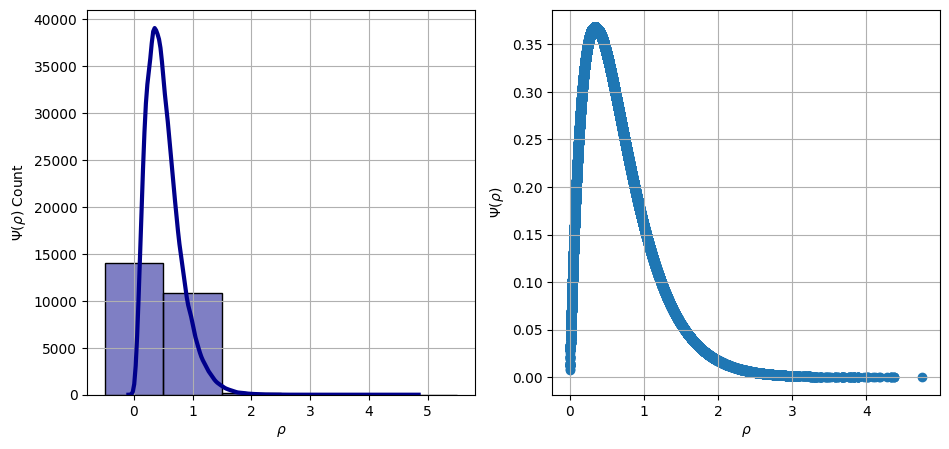

In [15]:
fig = plt.figure(figsize=(11,5))
# plt.suptitle(r'Energy and $\Psi(\rho)$ function distribution $He^+$')
plt.subplot(121)
sns.histplot(x=x_list_Li_p2, weights=y_list_Li_p2, discrete=True,
             color='darkblue', edgecolor='black',
             kde=True, kde_kws={'cut': 2}, line_kws={'linewidth': 3})
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\Psi(\rho)$ Count')
plt.grid()
plt.subplot(122)
plt.scatter(x_list_Li_p2,y_list_Li_p2)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\Psi(\rho)$')
plt.grid()

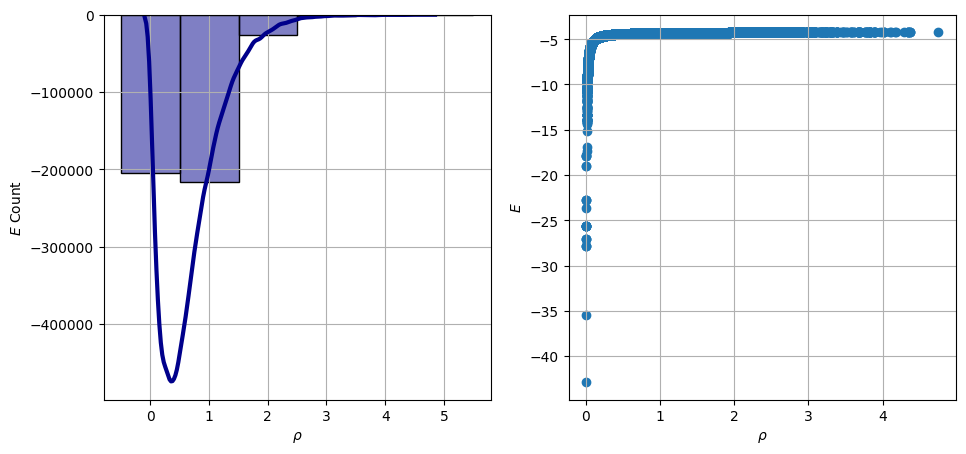

In [16]:
fig = plt.figure(figsize=(11,5))
plt.subplot(121)
sns.histplot(x=x_list_Li_p2, weights=E_list_Li_p2, discrete=True,
             color='darkblue', edgecolor='black',
             kde=True, kde_kws={'cut': 2}, line_kws={'linewidth': 3})
plt.xlabel(r'$\rho$')
plt.ylabel(r'$E$ Count')
plt.grid()
plt.subplot(122)
plt.scatter(x_list_Li_p2,E_list_Li_p2)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$E$')
plt.grid()

## 2. Parameter variasi $\alpha$ bervariasi <a class="anchor"  id="sub4.2"></a>

In [17]:
def QMC_alpha(x0, N_iter, N_step, alpha, Z, psi_func, E_func):
    E_list_, x_list_, acc_ratio_ = VMC(psi_func = psi_func, 
                                                E_func = E_func, 
                                                x0 = x0, N_iter = N_iter, 
                                                N_step = N_step, alpha=alpha, Z=Z)
    E_avg = avg_func(E_list_)
    E_var = st.variance(E_list_)
    x_avg = avg_func(x_list_)
    return [alpha, E_avg, E_var, x_avg, acc_ratio_]

### Hydrogen Atom

In [18]:
alpha_list_H = np.arange(0.1,2,0.1)
result_list_H = []
x0 = 2
N_iter = 1e5
N_step = 5
for i in alpha_list_H:
    result = QMC_alpha(x0 = x0, N_iter = N_iter, 
                       N_step = N_step, alpha=i, Z = 1,
                       psi_func = psi_H_ion_func, E_func = E_H_ion_func)
    result_list_H.append(result)
result_list_H = np.array(result_list_H)

In [19]:
head = '{:^5} | {:^7} | {:^7} | {:^7} | {:^7}'
rowf = '{:^5.1f} | {:^7.3f} | {:^7.3f} | {:^7.3f} | {:^7.3f}'
print(head.format('alpha','E avg','E var','x avg', 'acc'))
for i in result_list_H:
    print(rowf.format(i[0],i[1],i[2],i[3],i[4]))

alpha |  E avg  |  E var  |  x avg  |   acc  
 0.1  | -0.095  |  0.041  | 20.304  |  0.954 
 0.2  | -0.183  |  0.091  |  9.830  |  0.908 
 0.3  | -0.250  |  0.150  |  6.680  |  0.865 
 0.4  | -0.319  |  0.223  |  4.992  |  0.821 
 0.5  | -0.373  |  0.253  |  4.046  |  0.777 
 0.6  | -0.424  |  0.255  |  3.265  |  0.735 
 0.7  | -0.451  |  0.155  |  2.884  |  0.699 
 0.8  | -0.479  |  0.099  |  2.530  |  0.662 
 0.9  | -0.495  |  0.026  |  2.199  |  0.624 
 1.0  | -0.500  |  0.000  |  2.018  |  0.592 
 1.1  | -0.494  |  0.195  |  1.823  |  0.560 
 1.2  | -0.475  |  0.284  |  1.639  |  0.527 
 1.3  | -0.454  |  1.219  |  1.529  |  0.500 
 1.4  | -0.414  |  1.949  |  1.431  |  0.480 
 1.5  | -0.378  |  1.810  |  1.331  |  0.453 
 1.6  | -0.336  |  2.687  |  1.251  |  0.429 
 1.7  | -0.260  |  5.020  |  1.181  |  0.411 
 1.8  | -0.191  | 12.551  |  1.114  |  0.393 
 1.9  | -0.074  | 11.563  |  1.051  |  0.374 


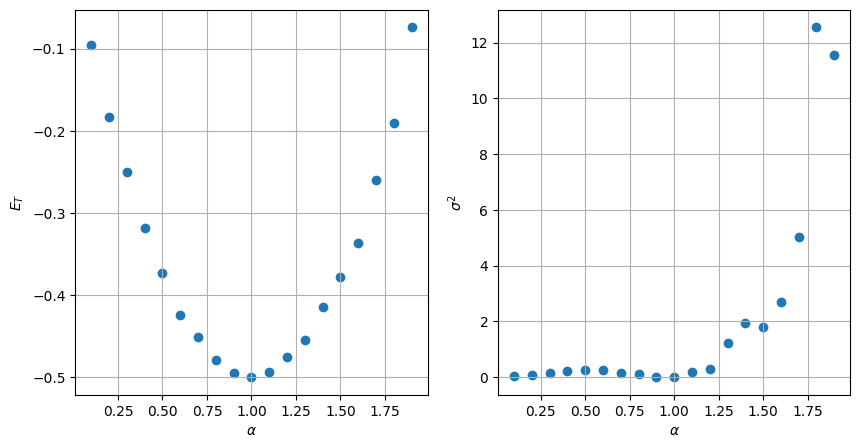

In [20]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(result_list_H[:,0],result_list_H[:,1])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$E_T$')
# plt.title(r'Plot of Energy for various trial parameter $\alpha$')
plt.grid()
plt.subplot(122)
plt.scatter(result_list_H[:,0],result_list_H[:,2])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\sigma^2$')
# plt.title(r'Plot of Variance for various trial parameter $\alpha$')
plt.grid()

### He+

In [21]:
alpha_list_He_p = np.arange(1,3,0.1)
result_list_He_p = []
x0 = 1
N_iter = 1e5
N_step = 3.5
for i in alpha_list_He_p:
    result = QMC_alpha(x0 = x0, N_iter = N_iter, 
                       N_step = N_step, alpha=i, Z = 2,
                       psi_func = psi_H_ion_func, E_func = E_H_ion_func)
    result_list_He_p.append(result)
result_list_He_p = np.array(result_list_He_p)

In [22]:
head = '{:^5} | {:^7} | {:^7} | {:^7} | {:^7}'
rowf = '{:^5.1f} | {:^7.3f} | {:^7.3f} | {:^7.3f} | {:^7.3f}'
print(head.format('alpha','E avg','E var','x avg', 'acc'))
for i in result_list_He_p:
    print(rowf.format(i[0],i[1],i[2],i[3],i[4]))

alpha |  E avg  |  E var  |  x avg  |   acc  
 1.0  | -1.503  |  4.454  |  1.998  |  0.696 
 1.1  | -1.586  |  3.290  |  1.831  |  0.672 
 1.2  | -1.686  |  4.423  |  1.699  |  0.644 
 1.3  | -1.750  |  4.743  |  1.542  |  0.620 
 1.4  | -1.813  |  2.645  |  1.431  |  0.597 
 1.5  | -1.866  |  1.987  |  1.323  |  0.576 
 1.6  | -1.915  |  1.323  |  1.248  |  0.551 
 1.7  | -1.949  |  0.953  |  1.170  |  0.531 
 1.8  | -1.979  |  0.875  |  1.109  |  0.513 
 1.9  | -2.004  |  4.387  |  1.046  |  0.490 
 2.0  | -2.000  |  0.000  |  0.997  |  0.478 
 2.1  | -1.997  |  0.139  |  0.959  |  0.463 
 2.2  | -1.976  |  0.801  |  0.916  |  0.445 
 2.3  | -1.953  |  2.276  |  0.867  |  0.428 
 2.4  | -1.925  |  5.070  |  0.832  |  0.412 
 2.5  | -1.893  |  4.538  |  0.799  |  0.400 
 2.6  | -1.810  | 17.093  |  0.770  |  0.387 
 2.7  | -1.717  | 23.265  |  0.734  |  0.372 
 2.8  | -1.697  | 20.793  |  0.711  |  0.363 
 2.9  | -1.613  | 78.339  |  0.693  |  0.351 


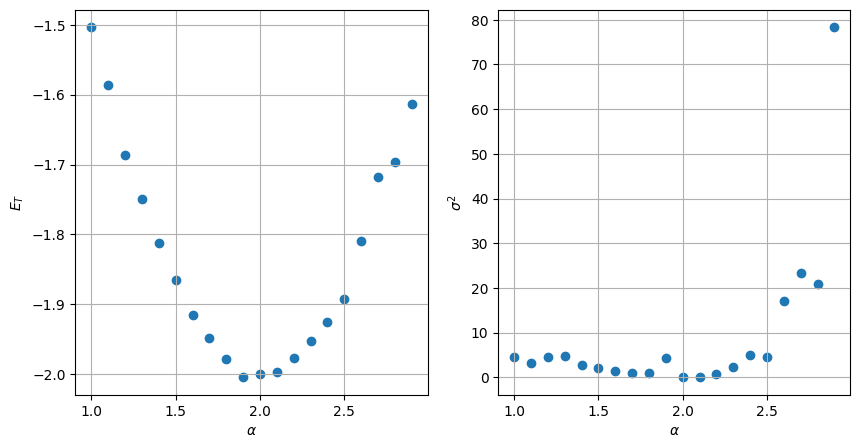

In [23]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(result_list_He_p[:,0],result_list_He_p[:,1])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$E_T$')
# plt.title(r'Plot of Energy for various trial parameter $\alpha$')
plt.grid()
plt.subplot(122)
plt.scatter(result_list_He_p[:,0],result_list_He_p[:,2])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\sigma^2$')
# plt.title(r'Plot of Variance for various trial parameter $\alpha$')
plt.grid()

### Li2+

In [24]:
alpha_list_Li_p2 = np.arange(2,4,0.1)
result_list_Li_p2 = []
x0 = 0.65
N_iter = 1e5
N_step = 2
for i in alpha_list_Li_p2:
    result = QMC_alpha(x0 = x0, N_iter = N_iter, 
                       N_step = N_step, alpha=i, Z = 3,
                       psi_func = psi_H_ion_func, E_func = E_H_ion_func)
    result_list_Li_p2.append(result)
result_list_Li_p2 = np.array(result_list_Li_p2)

In [25]:
head = '{:^5} | {:^7} | {:^7} | {:^7} | {:^7}'
rowf = '{:^5.1f} | {:^7.3f} | {:^7.3f} | {:^7.3f} | {:^7.3f}'
print(head.format('alpha','E avg','E var','x avg', 'acc'))
for i in result_list_Li_p2:
    print(rowf.format(i[0],i[1],i[2],i[3],i[4]))

alpha |  E avg  |  E var  |  x avg  |   acc  
 2.0  | -4.012  | 18.840  |  1.001  |  0.657 
 2.1  | -4.103  | 22.979  |  0.951  |  0.643 
 2.2  | -4.127  | 11.968  |  0.920  |  0.633 
 2.3  | -4.233  |  8.829  |  0.868  |  0.616 
 2.4  | -4.321  |  9.246  |  0.832  |  0.602 
 2.5  | -4.373  |  6.442  |  0.789  |  0.591 
 2.6  | -4.443  | 12.034  |  0.774  |  0.580 
 2.7  | -4.450  |  3.073  |  0.749  |  0.569 
 2.8  | -4.469  |  0.850  |  0.712  |  0.552 
 2.9  | -4.496  |  0.280  |  0.683  |  0.541 
 3.0  | -4.500  |  0.000  |  0.662  |  0.530 
 3.1  | -4.495  |  0.407  |  0.647  |  0.519 
 3.2  | -4.484  |  2.576  |  0.629  |  0.506 
 3.3  | -4.458  |  6.297  |  0.605  |  0.498 
 3.4  | -4.428  |  6.626  |  0.586  |  0.486 
 3.5  | -4.375  | 10.679  |  0.573  |  0.479 
 3.6  | -4.375  | 12.678  |  0.557  |  0.467 
 3.7  | -4.236  | 32.237  |  0.539  |  0.456 
 3.8  | -4.164  | 54.067  |  0.523  |  0.449 
 3.9  | -4.064  | 90.035  |  0.515  |  0.439 


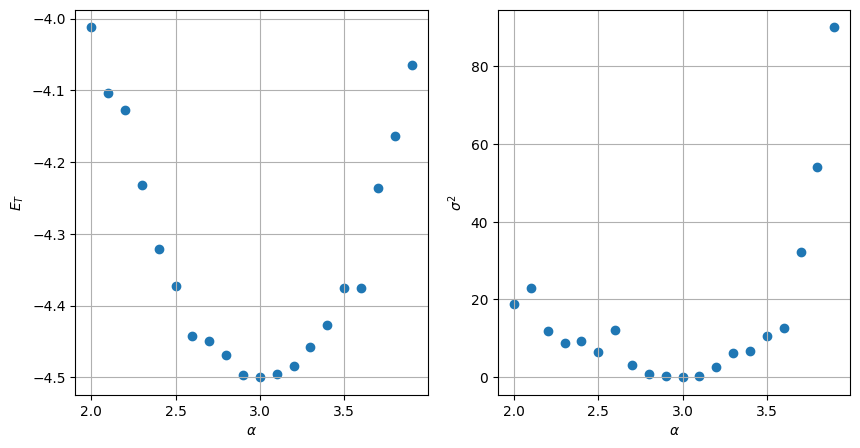

In [26]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(result_list_Li_p2[:,0],result_list_Li_p2[:,1])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$E_T$')
# plt.title(r'Plot of Energy for various trial parameter $\alpha$')
plt.grid()
plt.subplot(122)
plt.scatter(result_list_Li_p2[:,0],result_list_Li_p2[:,2])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\sigma^2$')
# plt.title(r'Plot of Variance for various trial parameter $\alpha$')
plt.grid()

- [Top](#top)